### Алгоритмические основы распознавания изображений
#### Лабораторная работа №3.
Задание 1. Реализовать адаптивное преобразование изображения в монохромное.

In [3]:
from PIL import Image, ImageDraw 

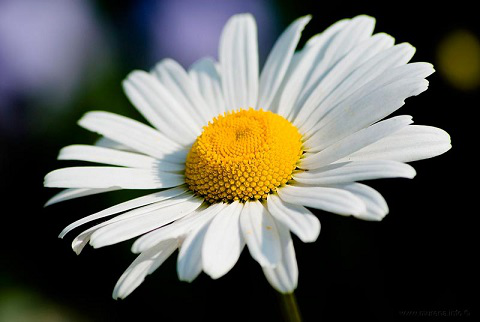

In [11]:
old_im = Image.open("test7.jpg") 

# size[0] is a width
# size[1] is a height
old_size = old_im.size

old_im

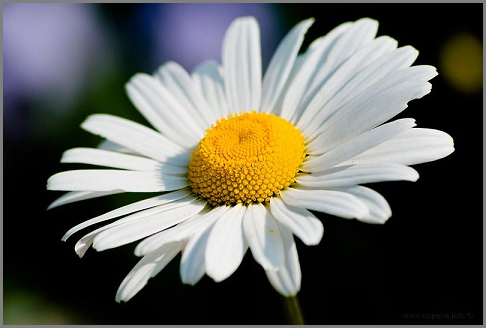

In [12]:
# locality
loc = 3
 
new_size = (old_size[0] + loc * 2, old_size[1] + loc * 2)
colorGray = (127, 127, 127) 

# image with frame
frame_im = Image.new("RGB", new_size, colorGray)   
frame_im.paste(old_im, ((new_size[0] - old_size[0]) // 2, (new_size[1] - old_size[1]) // 2))

# load pixels values
pix = frame_im.load() 
# pix[x-coord, y-coord][0] - red-value
# pix[x-coord, y-coord][1] - green-value
# pix[x-coord, y-coord][2] - blue -value

frame_im

In [13]:
# function for one pixel brightness calculation

def _brightness_(x, y):
    R_value = pix[x, y][0]
    G_value = pix[x, y][1]
    B_value = pix[x, y][2]
    Y = 0.222 * R_value + 0.707 * G_value + 0.071 * B_value
    return Y

In [14]:
# # # locality is a square

# # count pixels in the locality
# pixels_count = (2 * loc + 1) ** 2 - 1
# pixels_count

# # function for calculation the average brightness of pixels in the locality

# def _average_brightness_(x_center, y_center):
#     pixels_sum = 0
    
#     for i in range(x_center - loc, x_center + loc + 1):
#         for j in range(y_center - loc, y_center + loc + 1):
#             if (i != x_center and j != y_center):
#                 pixels_sum += _brightness_(i, j)
                
#     return (pixels_sum / pixels_count)

In [15]:
# # locality is a square without corner pixels

# count pixels in the locality
pixels_count = (2 * loc + 1) ** 2 - 1 - 4

# function for calculation the average brightness of pixels in the locality

def _average_brightness2_(x_center, y_center):
    pixels_sum = 0
    
    for i in range(x_center - loc, x_center + loc + 1):
        for j in range(y_center - loc, y_center + loc + 1):
            
            if ((i != x_center and j != y_center) 
                or (i != x_center - loc and j != y_center - loc) 
                or (i != x_center - loc and j != y_center + loc)
                or (i != x_center + loc and j != y_center - loc)
                or (i != x_center + loc and j != y_center + loc)):
                
                pixels_sum += _brightness_(i, j)
                
    return (pixels_sum / pixels_count)

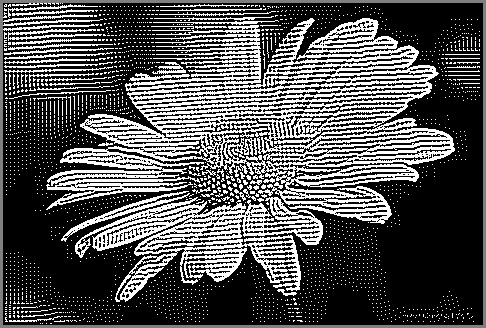

In [16]:
# create a tool for painting
draw = ImageDraw.Draw(frame_im) 

# compare the pixel brightness with a brightness border
# change the pixel brightness to white or black
for i in range(loc, new_size[0] - loc):
    for j in range(loc, new_size[1] - loc):
        if _brightness_(i, j) > _average_brightness2_(i, j):
#         if _brightness_(i, j) > 128:
            draw.point((i, j), (255, 255, 255))
        else:
            draw.point((i, j), (0, 0, 0))
            
# delete the tool for painting
del draw 
frame_im

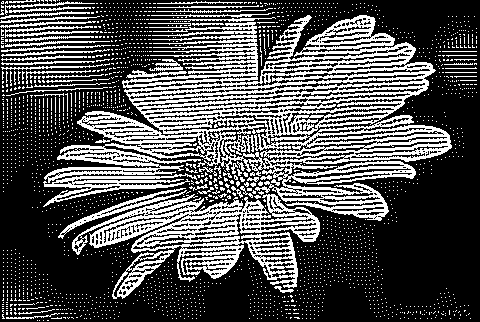

In [17]:
# image without frame

left = (new_size[0] - old_size[0]) // 2
top = (new_size[1] - old_size[1]) // 2
right = new_size[0] - (new_size[0] - old_size[0]) // 2
bottom = new_size[1] - (new_size[1] - old_size[1]) // 2

cropped_im = frame_im.crop((left, top, right, bottom))
cropped_im

In [18]:
# cropped_im.save("ans_test4.jpg", "JPEG")